In [1]:
#instalamos librerias
!pip install tf_slim
!pip install tf-models-official
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.0 MB/s 
     |████████████████████████████████| 48.3 MB 2.1 MB/s 
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 92 kB 9.8 MB/s 
     |████████████████████████████████| 1.2 MB 48.1 MB/s 
     |████████████████████████████████| 1.1 MB 61.2 MB/s 
     |████████████████████████████████| 99 kB 10.2 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 636 kB 46.0 MB/s 
     |████████████████████████████████| 4.6 MB 43.6 MB/s 
     |████████████████████████████████| 237 kB 60.6 MB/s 
     |████████████████████████████████| 1.6 MB 28.4 MB/s 
     |████████████████████████████████| 5.8 MB 41.5 MB

In [2]:
#Instalación de librería Object detecion
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
#!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://ar

In [3]:
#Descomprimimos el modelo base 
import zipfile
local_zip = "/content/modelo_entrenado.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/modelo_entrenado")
zip_ref.close()

In [5]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import numpy as np

## Revisar que la ruta sea la misma de la carpeta.
PATH_TO_MODEL_DIR = "/content/modelo_entrenado/content/fine_tuned_model"
PATH_TO_SAVE_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

detect_fn = tf.saved_model.load(PATH_TO_SAVE_MODEL)


In [6]:
# Cargamos el label map para utilizarlo.
label_map_pbtxt_fname = "/content/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

In [9]:
#actualizamos la versión de open-cv
!pip uninstall opencv-python-headless==4.1.2.62
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos una imagen fuera del dataset para probar nuestro modelo
image_path = "/content/Prueba_1.png"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)


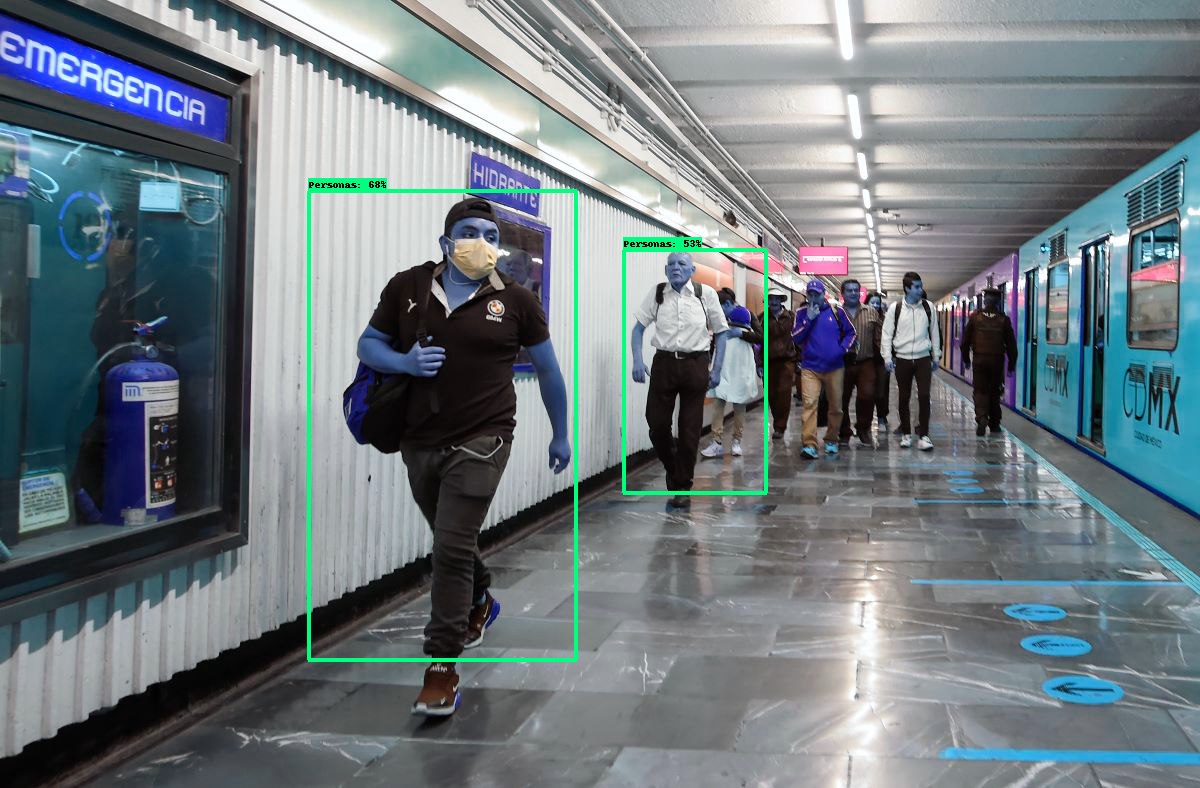

In [11]:
# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la librería de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

In [14]:
#Para aplicar object detection vamos a tener que importar las siguientes librerías
import numpy as np
import imutils
import time
import dlib
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from imutils.video import VideoStream
from imutils.video import FPS
from centroidtracker import CentroidTracker
from trackableobject import TrackableObject

In [15]:
# Ruta del video (Se debe cargar de manera manual)
PATH_VIDEO = "/content/test_video2.mp4"

# Ruta del video en donde almacenaremos los resultados
PATH_OUTPUT = "/content/video_out.mp4"

# Cuántos frames vamos a saltarnos (Durante estos frames nuestro algoritmo de seguimiento funciona)
SKIP_FPS = 30

# Cuál será el umbral mínimo par que se considere una detección
TRESHOLD = 0.5

# Cargamos el video
vs = cv2.VideoCapture(PATH_VIDEO)

# Inicializamos el writer para poder guardar el video
writer = None

# Definimos ancho y alto
W = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Inicializamos la clase centroid tracker con dos variable fundamentales
# maxDissapared (Si pasa ese tiempo y no se detecta más el centroide lo elimina)
# Si la distancia es mayor a maxDistance no lo podra asociar como si fuera el mismo objecto.
ct = CentroidTracker(maxDisappeared= 40, maxDistance = 50)

# Inicializamos variables principales
trackers = []
trackableObjects = {}

totalFrame = 0
totalDown = 0
totalUp = 0

DIRECTION_PEOPLE = True

# Creamos un umbral para saber si la persona esta caminando
POINT = [0, int((H/1.5)-H*0.5), W, int(H*0.7)]

# Los FPS nos van a permitir ver el rendimiento de nuestro modelo y si funciona en tiempo real.
fps = FPS().start()

# Definimos el formato del archivo resultante y las rutas.
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(PATH_OUTPUT, fourcc, 20.0, (W, H), True)

# Bucle que recorre todo el video
while True:
  # Leemos el primer frame
  ret, frame = vs.read()

  # Si ya no hay más frame, significa que el video termino y por tanto se sale del bucle
  if frame is None:
    break
  
  status = "Waiting"
  rects = []

  # Nos saltamos los frames especificados.
  if totalFrame % SKIP_FPS == 0:
    status = "Detecting"
    trackers = []
    # Tomamos la imagen la convertimos a array luego a tensor
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Predecimos los objectos y clases de la imagen
    detections = detect_fn(input_tensor)

    detection_scores = np.array(detections["detection_scores"][0])
    # Realizamos una limpieza para solo obtener las clasificaciones mayores al umbral.
    detection_clean = [x for x in detection_scores if x >= TRESHOLD]

    # Recorremos las detecciones
    for x in range(len(detection_clean)):
      idx = int(detections['detection_classes'][0][x])
      # Tomamos los bounding box 
      ymin, xmin, ymax, xmax = np.array(detections['detection_boxes'][0][x])
      box = [xmin, ymin, xmax, ymax] * np.array([W,H, W, H])

      (startX, startY, endX, endY) = box.astype("int")

      # Con la función de dlib empezamos a hacer seguimiento de los boudiung box obtenidos
      tracker = dlib.correlation_tracker()
      rect = dlib.rectangle(startX, startY, endX, endY)
      tracker.start_track(frame, rect)

      trackers.append(tracker)
  else:
    # En caso de que no hagamos detección haremos seguimiento
    # Recorremos los objetos que se les está realizando seguimiento
    for tracker in trackers:
      status = "Tracking"
      # Actualizamos y buscamos los nuevos bounding box
      tracker.update(frame)
      pos = tracker.get_position()

      startX = int(pos.left())
      startY = int(pos.top())
      endX = int(pos.right())
      endY = int(pos.bottom())

      rects.append((startX, startY, endX, endY))

  # Dibujamos el umbral de conteo
  cv2.rectangle(frame, (POINT[0], POINT[1]), (POINT[0]+ POINT[2], POINT[1] + POINT[3]), (255, 0, 255), 2)

  objects = ct.update(rects)

  # Recorremos cada una de las detecciones
  for (objectID, centroid) in objects.items():
    # Revisamos si el objeto ya se ha contado
    to = trackableObjects.get(objectID, None)
    if to is None:
      to = TrackableObject(objectID, centroid)

    else:
      # Si no se ha contado, analizamos la dirección del objeto
      y = [c[1] for c in to.centroids]
      direction = centroid[1] - np.mean(y)
      to.centroids.append(centroid)
      if not to.counted:
        if centroid[0] > POINT[0] and centroid[0] < (POINT[0]+ POINT[2]) and centroid[1] > POINT[1] and centroid[1] < (POINT[1]+POINT[3]):
          if DIRECTION_PEOPLE:
            if direction >0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True
          else:
            if direction <0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True

    trackableObjects[objectID] = to

    # Dibujamos el centroide y el ID de la detección encontrada
    text = "ID {}".format(objectID)
    cv2.putText(frame, text, (centroid[0]-10, centroid[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    cv2.circle(frame, (centroid[0], centroid[1]), 4, (0,255,0), -1)
  
  # Totalizamos los resultados finales
  info = [
          ("Caminando", totalDown),
          ("Estado", status),
  ]

  for (i, (k,v)) in enumerate(info):
    text = "{}: {}".format(k,v)
    cv2.putText(frame, text, (10, H - ((i*20) + 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

  # Almacenamos el framme en nuestro video resultante.
  writer.write(frame)
  totalFrame += 1
  fps.update()

# Terminamos de analizar FPS y mostramos resultados finales
fps.stop()

print("Tiempo completo {}".format(fps.elapsed()))
print("Tiempo aproximado por frame {}".format(fps.fps()))

# Cerramos el video.
writer.release()
vs.release()



Tiempo completo 28.622545
Tiempo aproximado por frame 36.92893137210545
